見てくださってありがとうございます！初心者ですが参加させていただきます．

主催のkenkenさんありがとうございます！

# ライブラリのインポート

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import warnings
warnings.simplefilter("ignore")
pd.set_option('display.max_columns', None)

# データの取り込み

In [2]:
train_df = pd.read_csv("/kaggle/input/prediction-of-seriously-ill-patients/train_df.csv",index_col="id")
test_df = pd.read_csv("/kaggle/input/prediction-of-seriously-ill-patients/test_df.csv",index_col="id")

# データチェック

In [3]:
print(train_df.shape)
train_df.head()

(51359, 84)


,personal_id_1,personal_id_2,facility_id,age,bmi,situation_1,situation_2,ethnicity,gender,height,weight,icu_id,icu_1,icu_2,icu_3,icu_4,icu_5,icu_6,icu_7,icu_8,glasgow_coma_scale_1,glasgow_coma_scale_2,glasgow_coma_scale_3,glasgow_coma_scale_4,heart_rate,blood_oxy,arterial_pressure,respiratory_rate,temp,blood_pressure_1,blood_pressure_2,blood_pressure_3,blood_pressure_4,v1_heartrate_max,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,w1,w2,w3,w4,w5,w6,w7,w8,w9,w10,w11,w12,w13,w14,w15,w16,w17,w18,x1,x2,x3,x4,x5,x6,aids,cirrhosis,diabetes,hepatic_issue,immunosuppression,leukemia,lymphoma,carcinoma,body_system_1,body_system_2,target_label
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,114501,58009,51,69.0,24.731460,0,1.0,Caucasian,M,175.30,76.0,698,Floor,admit,MICU,25.801389,302.0,109.09,0,0.0,3.0,6.0,0.0,3.0,100.0,0.0,50.0,33.0,NaN,59.0,46.0,59.0,46.0,96.0,91.0,84.0,53.0,84.0,53.0,16.0,14.0,100.0,97.0,124.0,67.0,124.0,67.0,37.10,36.80,46.0,46.0,46.0,46.0,96.0,96.0,53.0,53.0,53.0,53.0,16.0,16.0,100.0,100.0,75.0,67.0,75.0,67.0,243.0,76.0,3.5,3.5,0.25,0.07,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular,0
1,44353,112590,19,64.0,28.666129,0,1.0,Caucasian,M,183.00,96.0,657,Floor,admit,CCU-CTICU,3.639583,NaN,0.19,0,0.0,1.0,1.0,0.0,1.0,117.0,0.0,145.0,4.0,36.72,73.0,48.0,73.0,48.0,111.0,62.0,100.0,59.0,100.0,59.0,30.0,0.0,97.0,87.0,178.0,99.0,178.0,99.0,37.38,36.72,NaN,NaN,NaN,NaN,83.0,80.0,NaN,NaN,NaN,NaN,17.0,8.0,94.0,93.0,NaN,NaN,NaN,NaN,158.0,109.0,4.2,4.2,0.42,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0
2,8023,1677,16,74.0,18.144869,0,0.0,Caucasian,F,166.00,50.0,482,Accident & Emergency,admit,MICU,0.059028,304.0,307.01,0,0.0,4.0,6.0,0.0,5.0,53.0,0.0,50.0,6.0,36.10,65.0,39.0,65.0,39.0,71.0,55.0,73.0,50.0,73.0,50.0,18.0,11.0,100.0,100.0,122.0,69.0,122.0,69.0,37.00,36.10,65.0,65.0,65.0,65.0,62.0,59.0,73.0,73.0,73.0,73.0,18.0,13.0,100.0,100.0,100.0,100.0,100.0,100.0,73.0,62.0,4.2,4.1,0.07,0.03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Gastrointestinal,Gastrointestinal,0
3,106340,74166,188,60.0,23.047667,0,0.0,Caucasian,M,182.90,77.1,855,Accident & Emergency,admit,CCU-CTICU,0.014583,123.0,702.01,0,0.0,4.0,6.0,0.0,5.0,102.0,0.0,127.0,4.0,37.00,87.0,69.0,87.0,69.0,99.0,75.0,114.0,86.0,114.0,86.0,21.0,15.0,100.0,96.0,153.0,123.0,153.0,123.0,37.10,36.60,80.0,73.0,80.0,73.0,99.0,96.0,97.0,86.0,97.0,86.0,18.0,17.0,98.0,97.0,124.0,123.0,124.0,123.0,373.0,46.0,4.2,3.2,0.01,0.00,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic,0
4,118467,52717,168,75.0,20.190265,0,0.0,Caucasian,F,160.02,51.7,136,Accident & Emergency,admit,Med-Surg ICU,0.004861,304.0,308.01,0,0.0,4.0,6.0,0.0,5.0,90.0,0.0,68.0,28.0,36.80,87.0,87.0,87.0,87.0,90.0,90.0,105.0,105.0,105.0,105.0,14.0,11.0,97.0,92.0,147.0,147.0,147.0,147.0,36.80,36.80,100.0,56.0,100.0,56.0,67.0,61.0,104.0,68.0,104.0,68.0,28.0,24.0,94.0,90.0,142.0,114.0,142.0,114.0,NaN,NaN,NaN,NaN,0.08,0.02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Gastrointestinal,Gastrointestinal,0


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51359 entries, 0 to 51358
Data columns (total 84 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   personal_id_1         51359 non-null  int64  
 1   personal_id_2         51359 non-null  int64  
 2   facility_id           51359 non-null  int64  
 3   age                   48987 non-null  float64
 4   bmi                   49490 non-null  float64
 5   situation_1           51359 non-null  int64  
 6   situation_2           50959 non-null  float64
 7   ethnicity             50550 non-null  object 
 8   gender                51346 non-null  object 
 9   height                50645 non-null  float64
 10  weight                49880 non-null  float64
 11  icu_id                51359 non-null  int64  
 12  icu_1                 51299 non-null  object 
 13  icu_2                 51359 non-null  object 
 14  icu_3                 51359 non-null  object 
 15  icu_4              

In [5]:
train_df.isnull().sum()

personal_id_1       0
personal_id_2       0
facility_id         0
age              2372
bmi              1869
                 ... 
lymphoma          400
carcinoma         400
body_system_1     938
body_system_2     938
target_label        0
Length: 84, dtype: int64

In [6]:
train_df.describe()

,personal_id_1,personal_id_2,facility_id,age,bmi,situation_1,situation_2,height,weight,icu_id,icu_4,icu_5,icu_6,icu_7,icu_8,glasgow_coma_scale_1,glasgow_coma_scale_2,glasgow_coma_scale_3,glasgow_coma_scale_4,heart_rate,blood_oxy,arterial_pressure,respiratory_rate,temp,blood_pressure_1,blood_pressure_2,blood_pressure_3,blood_pressure_4,v1_heartrate_max,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,w1,w2,w3,w4,w5,w6,w7,w8,w9,w10,w11,w12,w13,w14,w15,w16,w17,w18,x1,x2,x3,x4,x5,x6,aids,cirrhosis,diabetes,hepatic_issue,immunosuppression,leukemia,lymphoma,carcinoma,target_label
count,51359.000000,51359.000000,51359.000000,48987.000000,49490.000000,51359.000000,50959.000000,50645.000000,49880.000000,51359.000000,51359.000000,50421.000000,50723.000000,51359.000000,50959.000000,50273.000000,50273.000000,50778.000000,50273.000000,50868.000000,50959.000000,50793.000000,50650.000000,49046.000000,51272.000000,51272.000000,50776.000000,50776.000000,51282.000000,51282.000000,51243.000000,51243.000000,50558.000000,50558.000000,51139.00000,51139.000000,51172.000000,51172.000000,51275.000000,51275.000000,50782.000000,50782.000000,50072.000000,50072.000000,49348.000000,49348.000000,47227.000000,47227.000000,49806.000000,49806.000000,48766.000000,48766.000000,46251.000000,46251.000000,48914.000000,48914.000000,49029.000000,49029.000000,49354.000000,49354.000000,47234.000000,47234.000000,48141.000000,48141.000000,45973.000000,45973.000000,46864.000000,46864.000000,50959.000000,50959.000000,50959.000000,50959.000000,50959.000000,50959.000000,50959.000000,50959.000000,51359.000000
mean,65683.061567,65536.544773,105.691816,62.331047,29.183068,0.182091,0.326910,169.580315,83.976174,509.329543,0.836042,185.589913,557.062732,0.199731,0.028023,3.462216,5.465081,0.009945,3.992939,99.613667,0.152279,88.167464,25.827769,36.413767,88.458632,50.142885,88.586340,50.222605,102.939374,70.349713,104.647874,64.866401,104.590945,64.932988,28.90037,12.878019,99.236946,90.484972,148.310951,96.917991,148.209759,96.978900,37.282690,36.269394,75.353023,62.837035,75.823343,63.275880,92.185038,83.637072,91.629598,79.413423,91.622343,79.731725,22.645255,17.245881,98.030492,95.162006,133.224501,116.367832,133.026273,116.563302,174.453252,114.286513,4.247847,3.934842,0.086122,0.043705,0.000805,0.015542,0.223670,0.013109,0.025511,0.007104,0.004199,0.020507,0.086295
std,37736.991231,37755.264608,62.880502,16.802751,8.261620,0.385923,0.469089,10.792119,25.020160,228.356757,2.541123,86.064743,462.734226,0.399802,0.165039,0.954095,1.299734,0.099230,1.561418,30.887266,0.359295,42.109907,15.128691,0.832349,19.817781,13.397587,19.810306,13.420357,22.029296,17.056104,20.872071,15.729182,20.740023,15.754629,10.74413,5.075743,1.680599,9.998473,25.760242,20.685893,25.804460,20.707571,0.693119,0.745620,18.446961,16.404868,18.534981,16.463719,21.856237,20.343372,20.589798,19.190610,20.633761,19.308731,7.544974,6.099057,3.259197,6.727578,27.564120,26.512530,27.693606,26.634091,86.642150,38.155563,0.663066,0.579846,0.248953,0.218307,0.028354,0.123696,0.416708,0.113741,0.157672,0.083985,0.064668,0.141727,0.280801
min,1.000000,1.000000,2.000000,16.000000,14.844926,0.000000,0.000000,137.200000,38.600000,82.000000,-13.775000,101.000000,0.020000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,30.000000,0.000000,40.000000,4.000000,32.100000,46.000000,13.000000,46.000000,13.000000,58.000000,0.000000,60.000000,22.000000,60.000000,22.000000,14.00000,0.000000,0.000000,0.000000,90.000000,41.000000,90.000000,41.030000,35.100000,31.889000,37.000000,22.000000,37.000000,22.000000,46.000000,36.000000,49.000000,32.000000,49.000000,32.000000,10.000000,0.000000,0.000000,0.000000,75.000000,53.000000,75.000000,53.000000,73.000000,33.000000,2.800000,2.400000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33052.500000,32771.500000,47.000000,52.000000,23.630801,0.000000,0.000000,162.500000,66.700000,369.000000,0.034722,113.000000,203.010000,0.000

# 欠損値の処理

In [7]:
numerical_feats = train_df.dtypes[train_df.dtypes != "object"].index
print("Numerical: ", len(numerical_feats))

categorical_feats = train_df.dtypes[train_df.dtypes == "object"].index
print("Categorical: ", len(categorical_feats))

Numerical:  77
Categorical:  7


In [8]:
from sklearn.preprocessing import LabelEncoder
def encode_label(df, i):
    print(i,df[i].nunique())
    df[i] = df[i].fillna("None")
    lbl = LabelEncoder() 
    lbl.fit(list(df[i].values)) 
    df[i] = lbl.transform(list(df[i].values))
    return df
l = len(train_df)
df = pd.concat([train_df,test_df])
for col in categorical_feats:
    df = encode_label(df, col)
train_df = df[:l]
test_df = df[l:]

ethnicity 6
gender 2
icu_1 5
icu_2 3
icu_3 8
body_system_1 11
body_system_2 10


In [9]:
train_df.fillna(train_df.mean(), inplace=True)
test_df.fillna(test_df.mean(), inplace=True)

# ヒストグラム

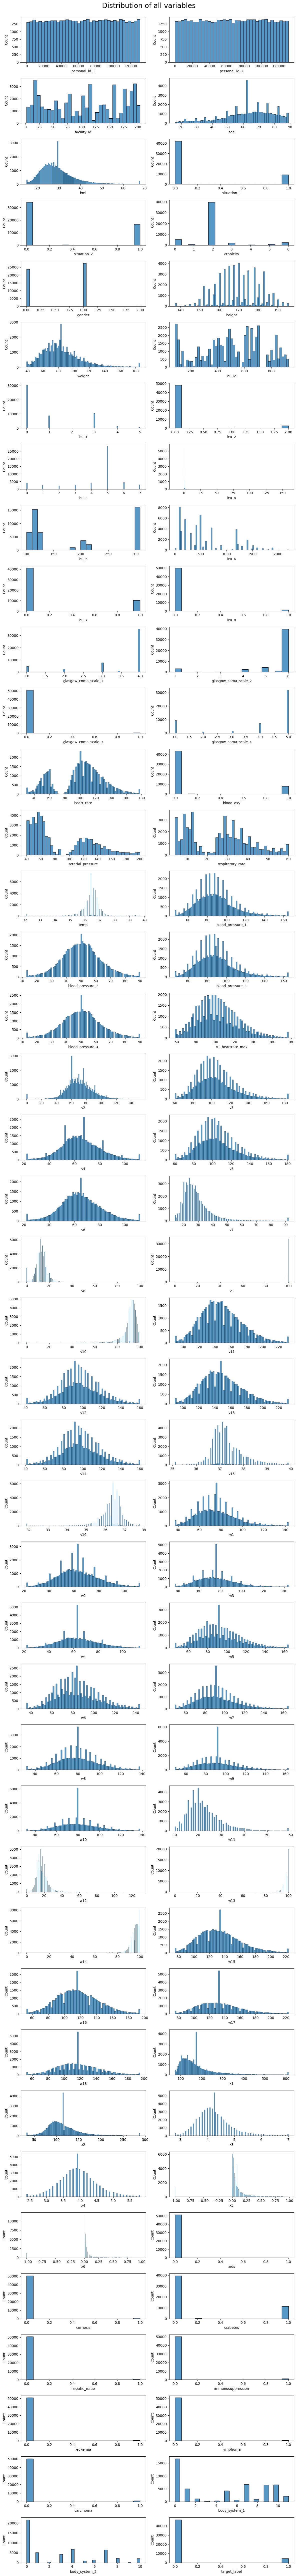

In [10]:
ncols = 2
nrows = np.ceil(len(train_df.columns)/ncols).astype(int)
fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=(12,nrows*2.5))
for c, ax in zip(train_df.columns, axs.flatten()):
    sns.histplot(train_df, x=c, ax=ax)
fig.suptitle('Distribution of all variables', fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.98])

## 外れ値っぽいのが目立つので処理予定！

# 相関係数のヒートマップ

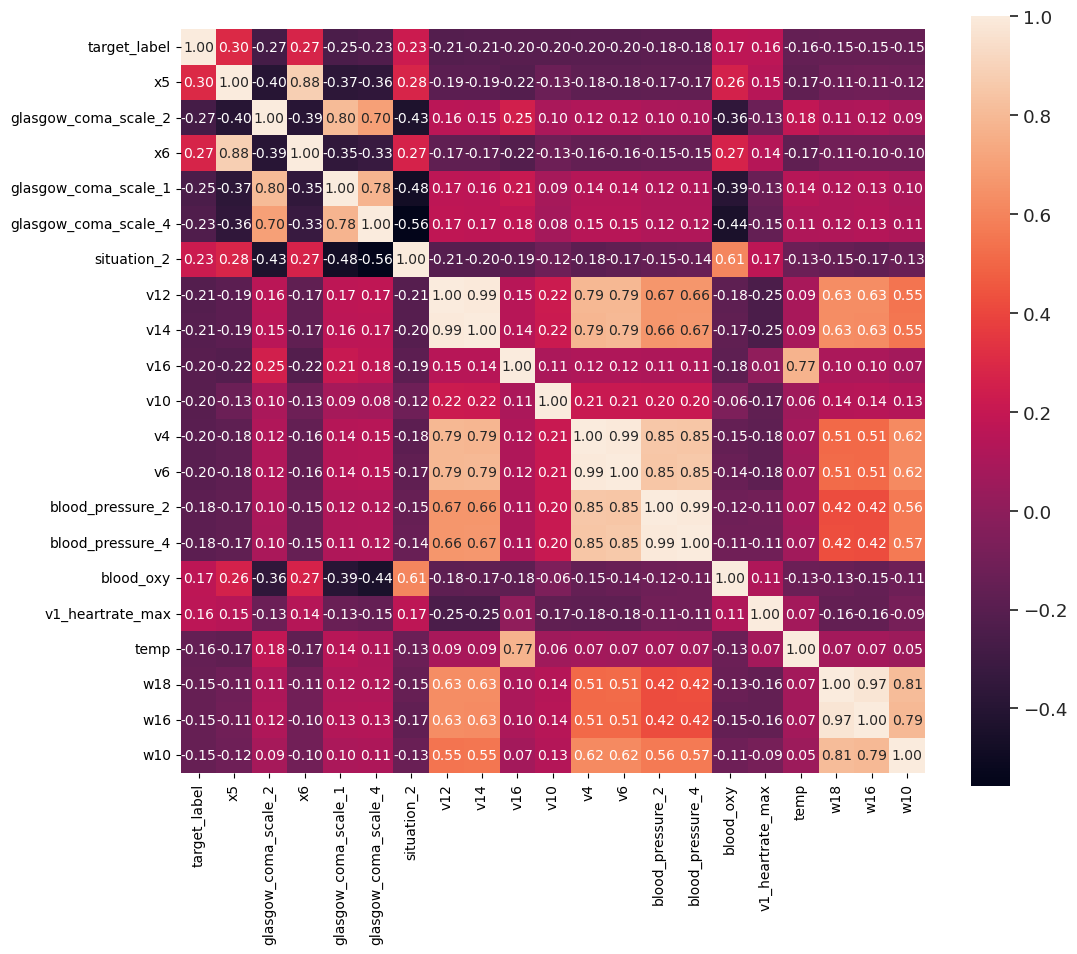

In [11]:
TARGET = "target_label"
k = 21 # number of variables for heatmap
corrmat = train_df.corr()
corrmat = np.abs(corrmat)
cols = corrmat.nlargest(k, TARGET)[TARGET].index
cm = np.corrcoef(train_df[cols].values.T)
fig, ax = plt.subplots(figsize=(12, 10))
sns.set(font_scale=1.2)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt=".2f", annot_kws={"size": 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

## 次元数の削減(PCA)も試す予定

# トレーニング

In [12]:
import xgboost as xgb
import lightgbm as lgb
import catboost as cat
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

In [13]:
y = train_df[TARGET]
X = train_df.drop(TARGET,axis=1)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2,random_state=0)

In [14]:
lgb_params = {
        'objective': 'binary',
        'metric': 'auc',
        'boosting_type': 'gbdt',
        'learning_rate':0.05,
        'task': 'train', 
        'seed':42,
        'n_estimators':20000,
}
model_lgb = lgb.LGBMClassifier(**lgb_params)
model_lgb.fit(X_train,
              y_train,
              eval_set=[(X_train, y_train),(X_valid, y_valid)],
              verbose=100,
              early_stopping_rounds=100)
roc_auc_score(y_valid,model_lgb.predict_proba(X_valid)[:,1])

[100]	training's auc: 0.941005	valid_1's auc: 0.886107
[200]	training's auc: 0.967825	valid_1's auc: 0.886998
[300]	training's auc: 0.982167	valid_1's auc: 0.887447
[400]	training's auc: 0.990775	valid_1's auc: 0.888168
[500]	training's auc: 0.995379	valid_1's auc: 0.888657
[600]	training's auc: 0.997818	valid_1's auc: 0.888428


0.8887530711779877

## 交差検証法もおこなう予定

# 予測の作成

In [15]:
sub = pd.read_csv("/kaggle/input/prediction-of-seriously-ill-patients/submission.csv")
sub[TARGET] = model_lgb.predict_proba(test_df.drop(TARGET,axis=1))[:,1]
sub.to_csv("/kaggle/working/lgb.csv",index=False)